In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Hotel Recommended Dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Hotel Recommended Dataset/ExistingHotels_CustomerVisitsdata-1554810038262.csv
/content/drive/My Drive/Hotel Recommended Dataset/NewHotels_CutstomerVisitsdata-1554810098964.csv
/content/drive/My Drive/Hotel Recommended Dataset/Train-1554810061973.csv
/content/drive/My Drive/Hotel Recommended Dataset/Test-1555730055539.csv
/content/drive/My Drive/Hotel Recommended Dataset/user_hotel_rating-1555730075105.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,adjusted_rand_score

from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
train = pd.read_csv("/content/drive/My Drive/Hotel Recommended Dataset/Train-1554810061973.csv")
print(train.shape)
train.head()

(6287, 6)


,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","Good hotel, charges for internet access The Ma...",good
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",Small but adequate rooms If you have an early ...,good
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","Better than average, some noisy rooms I have s...",good
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",Ordinary Although it is highly rated in these ...,bad


In [5]:
test = pd.read_csv("/content/drive/My Drive/Hotel Recommended Dataset/Test-1555730055539.csv")
print(test.shape)
test.head()

(3468, 5)


,Reviewid,Hotelid,userid,Date,reviewtext
0,Review_11001,hotel_101,hotel_2225,"Dec 13, 2008",Just An Average stay This was just an average ...
1,Review_11002,hotel_101,hotel_5079,"Dec 2, 2008",go elsewhere The place is hugely overpriced an...
2,Review_11003,hotel_101,hotel_8440,"Nov 18, 2008",I Won't Go Back I stayed at the hotel 11/14/08...
3,Review_11004,hotel_101,hotel_4592,"Oct 19, 2008",Good weekend stay My wife and I stay here quit...
4,Review_11005,hotel_101,hotel_5901,"Oct 13, 2008","Great airport stay Lovely indoor pool area, lo..."


In [6]:
# Reading and exploring on Existing hotels Data
exist = pd.read_csv("/content/drive/My Drive/Hotel Recommended Dataset/ExistingHotels_CustomerVisitsdata-1554810038262.csv")
print(exist.shape)
exist.head(3)

(7504, 15)


,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_101,hotel_2225,Just An Average stay This was just an average ...,"Dec 13, 2008",0,0,4,4,1,4,4,4,3,3.5,$245
1,hotel_101,hotel_5079,go elsewhere The place is hugely overpriced an...,"Dec 2, 2008",0,0,2,4,3,3,1,2,2,3.5,$245
2,hotel_101,hotel_8440,I Won't Go Back I stayed at the hotel 11/14/08...,"Nov 18, 2008",0,0,2,4,3,4,2,3,1,3.5,$245


In [8]:
# Reading and exploring on New_hotels Data
New = pd.read_csv("/content/drive/My Drive/Hotel Recommended Dataset/NewHotels_CutstomerVisitsdata-1554810098964.csv")
print(New.shape)
New.head(2)

(2469, 15)


,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_104,hotel_4342,Awesome Everything about this resort was great...,"Jan 5, 2009",0,0,6,6,6,6,6,6,6,4.0,$227
1,hotel_104,hotel_2024,Convenient When I say Above Average I'm compa...,"Nov 10, 2008",0,0,4,4,6,5,4,5,1,4.0,$227


In [9]:
# Reading and exploring on User_ratings data¶
ratings = pd.read_csv("/content/drive/My Drive/Hotel Recommended Dataset/user_hotel_rating-1555730075105.csv")
print(ratings.shape)
ratings.head(2)

(271935, 3)


,userid,Hotelid,OverallRating
0,user_78131,hotel_558,3
1,user_78131,hotel_603,2


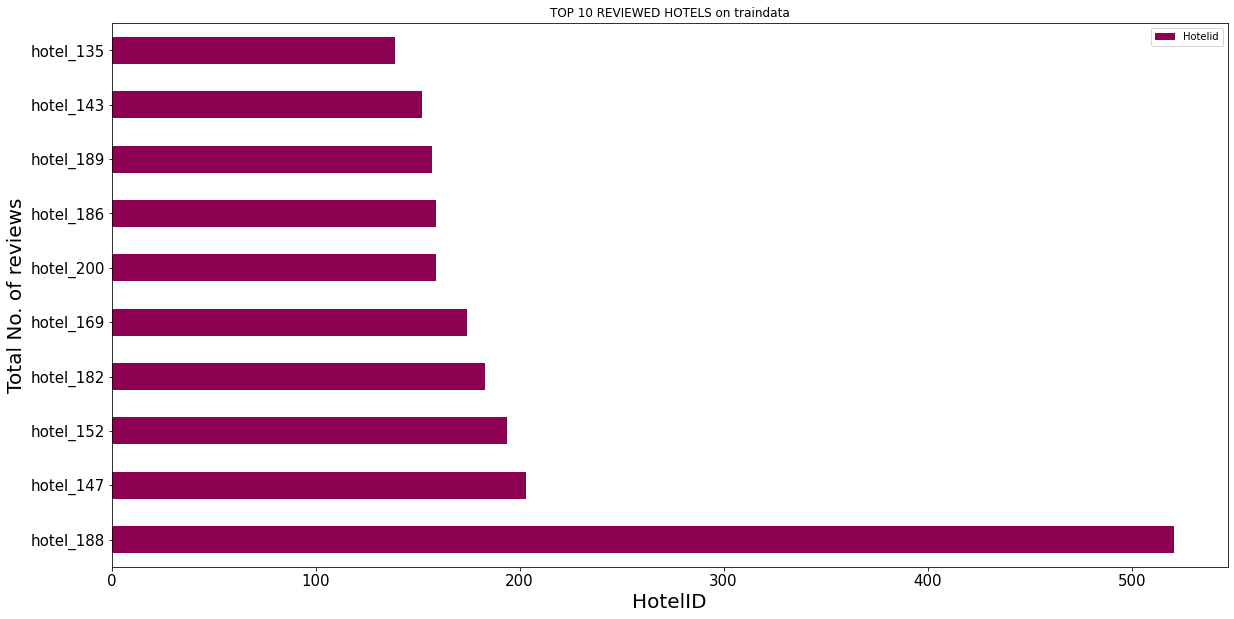

In [10]:
# VISUALIZATIONS on Train Data
# Let's look at the top 10 reviewed Hotels
top_reviewed_hotels = train.Hotelid.value_counts()
top_reviewed_hotels[:10].plot(kind='barh',figsize=(20,10),title="TOP 10 REVIEWED HOTELS on traindata",legend=True,colormap="PiYG",fontsize=15)
_=plt.xlabel('HotelID',fontsize=20)
_=plt.ylabel('Total No. of reviews',fontsize=20)

In [11]:
# Checking the reviews count with respect to date column
train['Date']=pd.to_datetime(train['Date'])

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

train["month"]=train["Date"].dt.month
train["Year"]=train["Date"].dt.year
train["Day"]=train["Date"].dt.day
train["dayOftheweek"] = train["Date"].dt.dayofweek
train['dayOftheweek'] = train['dayOftheweek'].apply(lambda x: days[x])

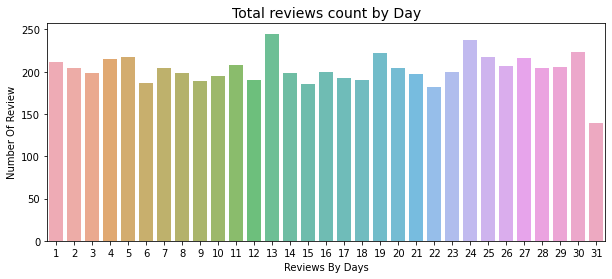

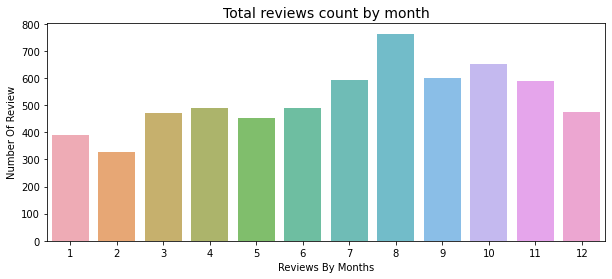

Text(0.5, 1.0, 'Total reviews count by Year')

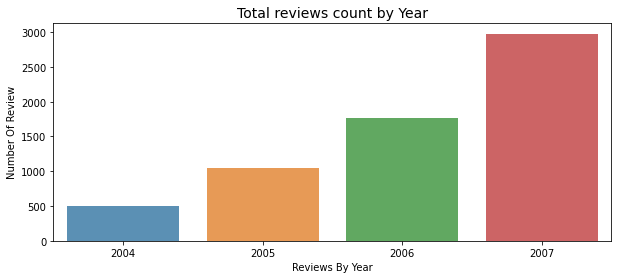

In [12]:
Review_Day_Count = train['Day'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(Review_Day_Count.index, Review_Day_Count.values, alpha=0.8)
plt.ylabel("Number Of Review")
plt.xlabel("Reviews By Days")
plt.title('Total reviews count by Day', loc='Center', fontsize=14)
plt.show()

Reviews_Count_Month = train['month'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(Reviews_Count_Month.index, Reviews_Count_Month.values, alpha=0.8)
plt.ylabel("Number Of Review")
plt.xlabel("Reviews By Months")
plt.title('Total reviews count by month', loc='Center', fontsize=14)
plt.show()

Reviews_Year = train['Year'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(Reviews_Year.index, Reviews_Year.values, alpha=0.8)
plt.ylabel("Number Of Review")
plt.xlabel("Reviews By Year")
plt.title('Total reviews count by Year', loc='Center', fontsize=14)


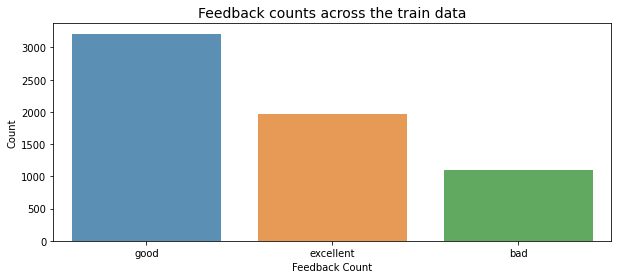

In [13]:
Sentiment_count = train['Sentiment'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(Sentiment_count.index, Sentiment_count.values, alpha=0.8)
plt.ylabel("Count")
plt.xlabel("Feedback Count")
plt.title('Feedback counts across the train data', loc='Center', fontsize=14)
plt.show()

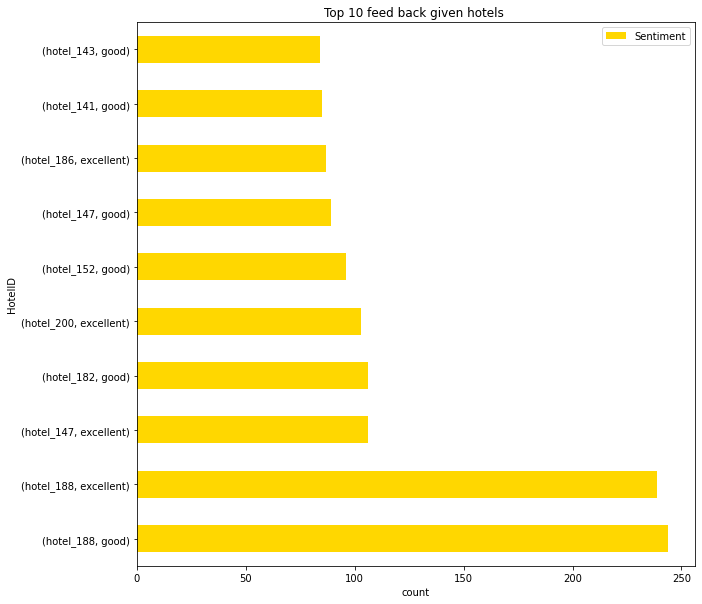

In [14]:
#Top 10 feed back given hotels
top_fb_hotels = train.groupby('Hotelid')['Sentiment'].value_counts().sort_values(ascending=False).head(10)
top_fb_hotels.plot(kind="barh",color="gold",title="Top 10 feed back given hotels ",legend=True,figsize=(10,10))
_=plt.xlabel('count')
_=plt.ylabel('HotelID')
plt.show()

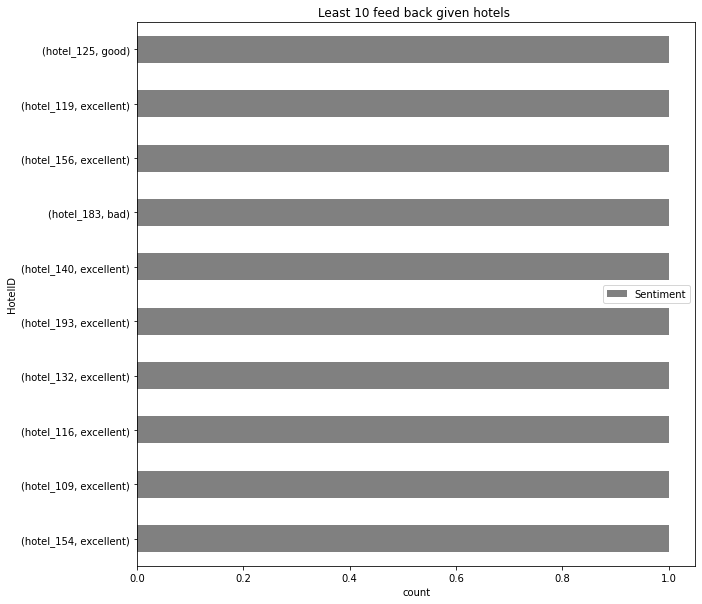

In [15]:
#Least 10 feed back given hotels
least_fb_hotels = train.groupby('Hotelid')['Sentiment'].value_counts().sort_values(ascending=True).head(10)
least_fb_hotels.plot(kind="barh",color="grey",title="Least 10 feed back given hotels ",legend=True,figsize=(10,10))
_=plt.xlabel('count')
_=plt.ylabel('HotelID')
plt.show()

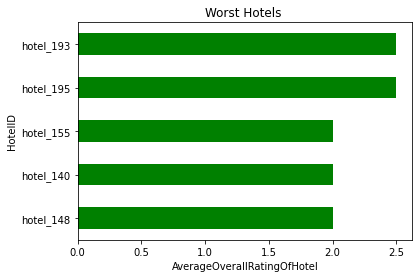

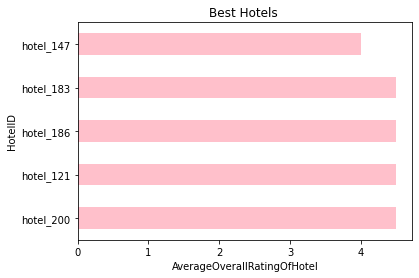

In [16]:
# As we can observe the trend in summer holidays i.e from April to August are more when compared to all the other months in all the years
###   On existing Hotels Data

exist['AverageOverallRatingOfHotel']=exist['AverageOverallRatingOfHotel'].astype("float64")

#Worst Hotels
worst_hotels =exist.groupby('Hotelid')['AverageOverallRatingOfHotel'].mean().sort_values(ascending=True).head(5)
worst_hotels.plot(kind="barh",color="green",title="Worst Hotels ")
_=plt.xlabel('AverageOverallRatingOfHotel')
_=plt.ylabel('HotelID')
plt.show()

#Best Hotels
best_hotels = exist.groupby('Hotelid')['AverageOverallRatingOfHotel'].mean().sort_values(ascending=False).head(5)
best_hotels.plot(kind="barh",color = "pink",title="Best Hotels ")
_=plt.xlabel('AverageOverallRatingOfHotel')
_=plt.ylabel('HotelID')
plt.show()


In [17]:
## Preprocessing On Train data and Test Data 

train["reviewtext"]=train["reviewtext"].apply(lambda x:re.sub("[^A-Za-z]", " ", x.strip()))
test["reviewtext"]=test["reviewtext"].apply(lambda x:re.sub("[^A-Za-z]", " ", x.strip()))

In [18]:
## Lower case
train['reviewtext'] = train['reviewtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['reviewtext'] = test['reviewtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [19]:
# Numbers Removal
train['reviewtext'] = train['reviewtext'].str.replace('[\d]', '')
test['reviewtext'] = test['reviewtext'].str.replace('[\d]', '')

In [20]:
# Punctuation Removal
train['reviewtext'] = train['reviewtext'].str.replace('[^\w\s]','')
test['reviewtext'] = test['reviewtext'].str.replace('[^\w\s]','')

In [22]:
# Stop words Removal
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
train['reviewtext'] = train['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['reviewtext'] = test['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# Common word removal
# On trainData
freq = pd.Series(' '.join(train['reviewtext']).split()).value_counts()[:10]
freq

hotel       13351
room        10561
great        6067
stay         4938
location     4026
would        3990
good         3842
staff        3668
rooms        3541
nice         3538
dtype: int64

In [24]:
freq = list(freq.index)
train['reviewtext'] = train['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['reviewtext'].head()

0                                marriot view king bed
1    charges internet access marriott airport seatt...
2    small adequate early morning flight catch choi...
3    better average noisy stayed times inthe last s...
4    ordinary although highly rated reviews pay pre...
Name: reviewtext, dtype: object

In [25]:
freq1 = pd.Series(' '.join(test['reviewtext']).split()).value_counts()[:10]
freq1

hotel       7143
room        5704
great       3035
stay        2506
would       2025
location    2021
staff       2011
nice        1978
good        1961
rooms       1870
dtype: int64

In [26]:
freq1 = list(freq1.index)
test['reviewtext'] = test['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
test['reviewtext'].head()

0    average average nothing standing weather recom...
1    go elsewhere place hugely overpriced mis manag...
2    go back stayed nights booked package marriotts...
3    weekend wife quite regularly visit seattle see...
4    airport lovely indoor pool area looks like lod...
Name: reviewtext, dtype: object

In [27]:
# Rare words removal
# On train Data
freq = pd.Series(' '.join(train['reviewtext']).split()).value_counts()[-10:]
freq

spate          1
trainee        1
wakened        1
doubleday      1
abroad         1
prescence      1
stripes        1
scape          1
oursurprise    1
ben            1
dtype: int64

In [28]:
freq = list(freq.index)
train['reviewtext'] = train['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['reviewtext'].head()

0                                marriot view king bed
1    charges internet access marriott airport seatt...
2    small adequate early morning flight catch choi...
3    better average noisy stayed times inthe last s...
4    ordinary although highly rated reviews pay pre...
Name: reviewtext, dtype: object

In [29]:
# On test Data
freq1 = pd.Series(' '.join(test['reviewtext']).split()).value_counts()[-10:]
freq1

aimed        1
inward       1
sail         1
pbs          1
enveloped    1
printers     1
motioned     1
klondike     1
inbetween    1
mentions     1
dtype: int64

In [30]:
freq1 = list(freq1.index)
test['reviewtext'] = test['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
test['reviewtext'].head()

0    average average nothing standing weather recom...
1    go elsewhere place hugely overpriced mis manag...
2    go back stayed nights booked package marriotts...
3    weekend wife quite regularly visit seattle see...
4    airport lovely indoor pool area looks like lod...
Name: reviewtext, dtype: object

In [31]:
# Stemming
st = PorterStemmer()
train["reviewtext"] = train['reviewtext'].apply(lambda x: " ".join([st.stem(word)
                                                                    for word in x.split()]))
test["reviewtext"] = test['reviewtext'].apply(lambda x: " ".join([st.stem(word)
                                                                  for word in x.split()]))

In [33]:
# Lemmatization
nltk.download('wordnet')
Lem = WordNetLemmatizer()

train["reviewtext"] = train['reviewtext'].apply(lambda x: " ".join([Lem.lemmatize(word)
                                                                    for word in x.split()]))

test["reviewtext"] = test['reviewtext'].apply(lambda x: " ".join([Lem.lemmatize(word)
                                                                  for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [34]:
# Converting the text data into list
Text_data1 = train['reviewtext'].tolist() 
Text_data2 = test['reviewtext'].tolist()

In [35]:
for i in range(len(Text_data1)):     
    Text_data1[i]=re.sub(r'\s+', ' ', Text_data1[i]) #Removing more than one white spaces in the sentence     
    Text_data1[i]=re.sub('[\d]', ' ',Text_data1[i]) 
    Text_data1[i]=re.sub(r'[^\x00-\x7F]+',' ',Text_data1[i])
    
Text_data1

['marriot view king bed',
 'charg internet access marriott airport seattl reason choic sea tac area paid per night shuttl gener quick airport encourag use rather taxi servic spotti seattl second floor back long walk matter way took interior check quick breakfast restaur bit pricey drink servic bar fine complaint imagin must get noisi lobbi crowd hang thebar guess marriott new program guest charg internet servic free busi center near check counter two internet pc one board pas access pc person abil sit check person work email sure mani taker pay extra access hope get nickel dime offer four star overal qualiti',
 'small adequ earli morn flight catch choic right airport recent renov new clean servic fast effici food neg small bathroom smallest encount mani year hardli turn around small person howev countertop granit also one elev seem odd size may self park valet park fee recommend extend fine one visit',
 'better averag noisi stay time inth last sever month first best subsequ one got bet

In [36]:
for i in range(len(Text_data2)):     
    Text_data2[i]=re.sub(r'\s+', ' ', Text_data2[i])     
    Text_data2[i]=re.sub('[\d]', ' ',Text_data2[i]) 
    Text_data2[i]=re.sub(r'[^\x00-\x7F]+','',Text_data2[i])

    Text_data2

In [37]:
# Splitting the Data
X_train,X_test,y_train,y_test = train_test_split(Text_data1,train['Sentiment'],test_size=0.3,random_state=124)

In [38]:
print(y_train.value_counts())
print(y_test.value_counts())

good         2263
excellent    1355
bad           782
Name: Sentiment, dtype: int64
good         950
excellent    616
bad          321
Name: Sentiment, dtype: int64


In [39]:
# Creating a Tfidf Matrix
tfidf_transformer = TfidfVectorizer(ngram_range=(1,1),stop_words='english',max_features=350)
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
print(X_train_tfidf.shape)
# Get the tfidf matrix for test documents
X_test_tfidf = tfidf_transformer.transform(X_test) 
print(X_test_tfidf.shape)

test_tfidf=tfidf_transformer.transform(Text_data2)

(4400, 350)
(1887, 350)


In [40]:
# MODEL BUILDING
# Navie Bayes model

nb_clf = MultinomialNB().fit(X_train_tfidf,y_train) 

pred_train = nb_clf.predict(X_train_tfidf)  
pred_test = nb_clf.predict(X_test_tfidf)

In [41]:
print(accuracy_score(y_train,pred_train)) 
print(accuracy_score(y_test,pred_test))

0.6322727272727273
0.5871754107048225


In [42]:
# LOGISTIC REGRESSION
logmod=LogisticRegression()

logmod.fit(X_train_tfidf,y_train)

pred_train_log = logmod.predict(X_train_tfidf)
pred_test_log = logmod.predict(X_test_tfidf)
test_pred = logmod.predict(test_tfidf)

print("Accuracy on train is:",accuracy_score(y_train,pred_train_log))
print("Accuracy on test is:",accuracy_score(y_test,pred_test_log))

Accuracy on train is: 0.7186363636363636
Accuracy on test is: 0.6486486486486487


In [43]:
# Using Grid search Model

param_grid={
    "C":[10,20],
    "max_iter":[100,150]
}
param_grid_model = GridSearchCV(estimator = logmod, param_grid = param_grid, cv =5,n_jobs=-1)

In [44]:
param_grid_model.fit(X_train_tfidf,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [10, 20], 'max_iter': [100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
y_preds_lr_train = param_grid_model.best_estimator_.predict(X_train_tfidf)
y_preds_lr_test = param_grid_model.best_estimator_.predict(X_test_tfidf)
test_pred_gd = param_grid_model.best_estimator_.predict(test_tfidf)

In [46]:
print("Accuracy on train is:",accuracy_score(y_train,y_preds_lr_train))
print("Accuracy on test is:",accuracy_score(y_test,y_preds_lr_test))

Accuracy on train is: 0.7304545454545455
Accuracy on test is: 0.6359300476947536


In [47]:
# submission file 
test_Id = test.Reviewid.copy()
submission = pd.DataFrame()
submission['Id'] = test_Id

In [48]:
submission['Sentiment'] = test_pred_gd
submission.head()
submission.to_csv('final_subsmission.csv', index=False)

In [49]:
# These are the other models
# DECISION TREES
dtc = DecisionTreeClassifier()
dtc.fit(X_train_tfidf,y_train)

pred_train_dt = dtc.predict(X_train_tfidf)
pred_test_dt = dtc.predict(X_test_tfidf)

print("Accuracy on train is:",accuracy_score(y_train,pred_train_dt))

print("Accuracy on test is:",accuracy_score(y_test,pred_test_dt))

Accuracy on train is: 0.9881818181818182
Accuracy on test is: 0.492845786963434


In [50]:
# RANDOM FOREST

rfc=RandomForestClassifier()
rfc.fit(X=X_train_tfidf,y=y_train)

pred_train_rf=rfc.predict(X_train_tfidf)

pred_test_rf=rfc.predict(X_test_tfidf)

print("Accuracy on train is:",accuracy_score(y_train , pred_train_rf))

print("Accuracy on test is:",accuracy_score(y_test , pred_test_rf))

Accuracy on train is: 0.9881818181818182
Accuracy on test is: 0.6179120296767355


In [51]:
# ADA BOOST
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators = 600,
    learning_rate = 1)
# Train model
%time Adaboost_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluations 
pred_train_Ada = Adaboost_model.predict(X_train_tfidf)

pred_test_Ada = Adaboost_model.predict(X_test_tfidf)

print("Accuracy on train is:",accuracy_score(y_train,pred_train_Ada ))

print("Accuracy on test is:",accuracy_score(y_test,pred_test_Ada ))

CPU times: user 31.6 s, sys: 74.6 ms, total: 31.7 s
Wall time: 31.7 s
Accuracy on train is: 0.9006818181818181
Accuracy on test is: 0.5871754107048225


In [52]:
# XG BOOST
XGB_model = XGBClassifier()
# training the xgboost classifier
%time XGB_model.fit(X_train_tfidf, y_train)

pred_train_XG = XGB_model.predict(X_train_tfidf)

pred_test_XG = XGB_model.predict(X_test_tfidf)

print("Accuracy on train is:",accuracy_score(y_train,pred_train_XG ))

print("Accuracy on test is:",accuracy_score(y_test,pred_test_XG ))

CPU times: user 4.64 s, sys: 11 ms, total: 4.65 s
Wall time: 4.74 s
Accuracy on train is: 0.7484090909090909
Accuracy on test is: 0.6120826709062003


In [53]:
# Preprocessing on Existing Hotels Data and New Hotels Data
# Verifying the NULL values
print("__________On existing hotels data _______________")
print(exist.isnull().sum().sort_values(ascending=True))
print("__________On New hotels data _______________")
print(New.isnull().sum().sort_values(ascending=True))

__________On existing hotels data _______________
Hotelid                        0
userid                         0
reviewtext                     0
Date                           0
NoOfReaders                    0
HelpfulToNoOfreaders           0
Value_rating                   0
Rooms_rating                   0
Location_rating                0
Cleanliness_rating             0
Checkin_rating                 0
Service_rating                 0
Businessservice_rating         0
AverageOverallRatingOfHotel    0
AveragePricing                 0
dtype: int64
__________On New hotels data _______________
Hotelid                        0
userid                         0
reviewtext                     0
Date                           0
NoOfReaders                    0
HelpfulToNoOfreaders           0
Value_rating                   0
Rooms_rating                   0
Location_rating                0
Cleanliness_rating             0
Checkin_rating                 0
Service_rating                 0
B

In [54]:
# Separating the Averagepricing Column
exist=exist.join(exist['AveragePricing'].str.split('$', 1, expand=True).rename(columns={ 1:'AvgPricing'}))
exist = exist.drop(0,axis=1)

New=New.join(New['AveragePricing'].str.split('$', 1, expand=True).rename(columns={ 1:'AvgPricing'}))
New = New.drop(0,axis=1)

In [55]:
# Creating a LengthOfReview Column
exist['LengthofReview'] = exist['reviewtext'].apply(lambda x: len(str(x).split(" ")))

New['LengthofReview'] = New['reviewtext'].apply(lambda x: len(str(x).split(" ")))

In [56]:
# Dropping the unnecessary columns
exist = exist.drop(["Date","userid","reviewtext","AveragePricing"],axis=1)
New = New.drop(["Date","userid","reviewtext","AveragePricing"],axis=1)

In [57]:
print("___________Existing hotels Dtypes____________")
print(exist.dtypes)

print("___________New hotels Dtypes____________")
print(New.dtypes)

___________Existing hotels Dtypes____________
Hotelid                         object
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
Value_rating                     int64
Rooms_rating                     int64
Location_rating                  int64
Cleanliness_rating               int64
Checkin_rating                   int64
Service_rating                   int64
Businessservice_rating           int64
AverageOverallRatingOfHotel    float64
AvgPricing                      object
LengthofReview                   int64
dtype: object
___________New hotels Dtypes____________
Hotelid                         object
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
Value_rating                     int64
Rooms_rating                     int64
Location_rating                  int64
Cleanliness_rating               int64
Checkin_rating                   int64
Service_rating                   int64
Businessservice_rating           int64
Av

In [58]:
exist["AvgPricing"] = exist["AvgPricing"].astype("float64")
New["AvgPricing"] = New["AvgPricing"].astype("float64")

In [59]:
print("___________Unique values count on existing hotels___________")
unique_counts = pd.DataFrame.from_records([(col, exist[col].nunique()) for col in exist.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
print(unique_counts)


print("___________Unique values count on New hotels___________")
unique_counts = pd.DataFrame.from_records([(col, New[col].nunique()) for col in New.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
print(unique_counts)

___________Unique values count on existing hotels___________
                    Column_Name  Num_Unique
3                  Value_rating           6
4                  Rooms_rating           6
5               Location_rating           6
6            Cleanliness_rating           6
7                Checkin_rating           6
8                Service_rating           6
9        Businessservice_rating           6
10  AverageOverallRatingOfHotel           6
2          HelpfulToNoOfreaders          36
1                   NoOfReaders          48
11                   AvgPricing          66
0                       Hotelid          75
12               LengthofReview         620
___________Unique values count on New hotels___________
                    Column_Name  Num_Unique
3                  Value_rating           6
4                  Rooms_rating           6
5               Location_rating           6
6            Cleanliness_rating           6
7                Checkin_rating           6
8  

In [60]:
# Feature Engineering
# On Existing hotels Data
MR = exist.groupby(['Hotelid']).mean().reset_index()

MR.drop(['NoOfReaders',"HelpfulToNoOfreaders"],axis=1, inplace=True)

MR1 = pd.DataFrame(exist.groupby('Hotelid')['NoOfReaders',"HelpfulToNoOfreaders"].sum().reset_index())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


In [61]:
Existing_Hotels = pd.merge(MR1,MR,on=['Hotelid','Hotelid'])
Existing_Hotels.dtypes

Hotelid                         object
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
Value_rating                   float64
Rooms_rating                   float64
Location_rating                float64
Cleanliness_rating             float64
Checkin_rating                 float64
Service_rating                 float64
Businessservice_rating         float64
AverageOverallRatingOfHotel    float64
AvgPricing                     float64
LengthofReview                 float64
dtype: object

In [62]:
# On New Hotels Data
MR2 = New.groupby(['Hotelid']).mean().reset_index()

MR2.drop(['NoOfReaders',"HelpfulToNoOfreaders"],axis=1, inplace=True)

MR3 = pd.DataFrame(New.groupby('Hotelid')['NoOfReaders',"HelpfulToNoOfreaders"].sum().reset_index())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [63]:
New_Hotels = pd.merge(MR2,MR3,on=['Hotelid','Hotelid'])
New_Hotels.dtypes

Hotelid                         object
Value_rating                   float64
Rooms_rating                   float64
Location_rating                float64
Cleanliness_rating             float64
Checkin_rating                 float64
Service_rating                 float64
Businessservice_rating         float64
AverageOverallRatingOfHotel    float64
AvgPricing                     float64
LengthofReview                 float64
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
dtype: object

In [64]:
# Drop the Hotelid Column
Existing_Hotels = Existing_Hotels.drop("Hotelid",axis=1)
New_Hotels = New_Hotels.drop("Hotelid",axis=1)

In [65]:
# CLUSTERING
# Standardizing the data
std = StandardScaler()
std.fit(Existing_Hotels)
X_train_std= std.transform(Existing_Hotels)
X_test_std= std.transform(New_Hotels)

In [66]:
# KMEANS Model
kmeans = KMeans(n_clusters=2,random_state=99999)

kmeans = kmeans.fit(X_train_std)

labels_train = kmeans.predict(X_train_std)
labels_test = kmeans.predict(X_test_std)

# Centroid values
centroids = kmeans.cluster_centers_

In [67]:
## Checking the values
centroids

array([[-0.46805497, -0.46441865, -1.24320582, -1.17685725, -0.78544215,
        -1.28385294, -0.956444  , -1.18630668, -0.57484694, -1.08942392,
        -0.59377456,  0.46238611],
       [ 0.17020181,  0.16887951,  0.45207484,  0.42794809,  0.28561533,
         0.46685561,  0.34779782,  0.43138425,  0.20903525,  0.39615415,
         0.21591802, -0.1681404 ]])

In [68]:
labels_train

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int32)

In [69]:
labels_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [70]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[-0.46805497 -0.46441865 -1.24320582 -1.17685725 -0.78544215 -1.28385294
  -0.956444   -1.18630668 -0.57484694 -1.08942392 -0.59377456  0.46238611]
 [ 0.17020181  0.16887951  0.45207484  0.42794809  0.28561533  0.46685561
   0.34779782  0.43138425  0.20903525  0.39615415  0.21591802 -0.1681404 ]]
626.2831957272008


In [71]:
#  Checking For Various Values of K
wss= {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_std)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_

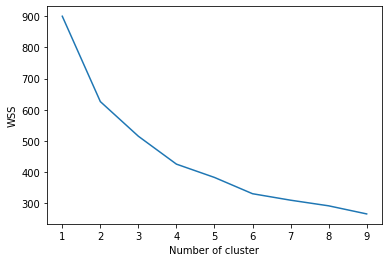

In [72]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

In [73]:
wss

{1: 899.9999999999999,
 2: 626.2831957272008,
 3: 515.1707051731564,
 4: 425.7339367789922,
 5: 383.05498959326485,
 6: 330.8482584764987,
 7: 310.1082306394598,
 8: 292.06135404134307,
 9: 266.08859762567874}

In [74]:
# KMEANS Model with "K" value
kmeans = KMeans(n_clusters=5,random_state=9999)

kmeans.fit(Existing_Hotels)

Existing_Hotels["cluster"] = kmeans.predict(Existing_Hotels)
New_Hotels["cluster"] = kmeans.predict(New_Hotels)

# Centroid values
centroids = kmeans.cluster_centers_

In [75]:
# Checking for cluster Stability
indices=Existing_Hotels.sample(frac=0.8,random_state=123).index
print(indices)

Int64Index([23, 68, 24, 43, 45, 72, 42, 73, 37, 70, 51,  8,  4, 61,  9, 26, 65,
            67,  1, 74, 62, 58, 31, 14, 53, 16, 19, 54,  6, 60, 44, 29, 59, 15,
            18, 13, 22, 10, 69, 11,  0,  5,  3, 40, 12, 50, 34, 27, 30, 21, 33,
            38, 52, 28, 35, 41,  7, 48, 56, 71],
           dtype='int64')


In [77]:
# Subsetting 80% of train data
Alpha = Existing_Hotels.loc[indices,:]
Alpha.shape

(60, 13)

In [78]:
kmeans = KMeans(n_clusters=5,random_state=45)
kmeans2=kmeans.fit(Alpha)
print(len(kmeans2.labels_))
Alpha['cluster']=kmeans2.labels_

60


In [79]:
g1=Existing_Hotels.loc[indices,'cluster']
g2=Alpha.cluster

In [80]:
# Cluster Stability
adjusted_rand_score(g1,g2)

0.9407254875415934

In [81]:
print("__________On user ratings data _______________")
print(ratings.isnull().sum().sort_values(ascending=True))

__________On user ratings data _______________
userid           0
Hotelid          0
OverallRating    0
dtype: int64


In [82]:
# Verifying the unique counts on the data
print("___________Unique values count on existing hotels___________")
unique_counts = pd.DataFrame.from_records([(col, ratings[col].nunique()) for col in ratings.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
print(unique_counts)

___________Unique values count on existing hotels___________
     Column_Name  Num_Unique
2  OverallRating           5
1        Hotelid         130
0         userid        5010


In [83]:
# Feature Engineering
# calculating the mean ratings for each hotel
  
rating = pd.DataFrame(ratings.groupby('Hotelid')['OverallRating'].count())  
rating["ratings_count"] = rating["OverallRating"]
rating=rating.drop("OverallRating",axis=1)

In [84]:
# sorting based on count of ratings that each hotelId got  
  
rating.sort_values('ratings_count', ascending=False).head()

,ratings_count
Hotelid,
hotel_608,2489
hotel_557,2487
hotel_555,2487
hotel_552,2487
hotel_620,2487


In [85]:
ratings_pivot = ratings.pivot_table(values='OverallRating', index='userid', columns='Hotelid')  
  
ratings_pivot.head()

Hotelid,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,hotel_512,hotel_513,hotel_514,hotel_515,hotel_516,hotel_517,hotel_519,hotel_521,hotel_522,hotel_523,hotel_524,hotel_525,hotel_526,hotel_527,hotel_528,hotel_529,hotel_530,hotel_532,hotel_533,hotel_534,hotel_535,hotel_536,hotel_537,hotel_538,hotel_539,hotel_540,hotel_541,hotel_542,hotel_543,hotel_544,...,hotel_599,hotel_600,hotel_601,hotel_602,hotel_603,hotel_604,hotel_605,hotel_606,hotel_607,hotel_608,hotel_610,hotel_611,hotel_612,hotel_613,hotel_614,hotel_615,hotel_616,hotel_617,hotel_618,hotel_619,hotel_620,hotel_621,hotel_622,hotel_623,hotel_624,hotel_625,hotel_626,hotel_627,hotel_628,hotel_629,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
user_21002,NaN,3.0,NaN,3.0,3.0,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,5.0,4.0,3.0,4.0,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,3.0,NaN,3.0,3.0,3.0,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN
user_21025,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,3.0,2.0,NaN,4.0,3.0,NaN,4.0,NaN,4.0,NaN,4.0,4.0,3.0,NaN,NaN,4.0,NaN,4.0,NaN,3.0,3.0,4.0,NaN,NaN,3.0,3.0,3.0,NaN,NaN,3.0,NaN,NaN,...,2.0,NaN,3.0,4.0,2.0,3.0,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,3.0,2.0,NaN,4.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,4.0,2.0,NaN,NaN,3.0,3.0
user_21042,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,3.0,NaN,3.0,2.0,NaN,4.0,3.0,NaN,3.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,3.0,4.0,2.0,NaN,2.0,2.0,NaN,NaN,2.0,2.0,...,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,2.0,2.0,NaN,2.0,2.0,NaN,2.0,NaN,3.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN
user_21051,NaN,2.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,5.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0
user_21054,NaN,1.0,NaN,1.0,NaN,3.0,4.0,2.0,NaN,4.0,NaN,3.0,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0,NaN,3.0,NaN,2.0,...,2.0,NaN,5.0,3.0,NaN,2.0,NaN,1.0,NaN,2.0,3.0,1.0,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,3.0,2.0,1.0,2.0,4.0,4.0


In [86]:
# we can calculate the correlation of the Hotelid column with all others and for this we can use the corrwith function
X = ratings_pivot["hotel_510"] 

In [87]:
# Checking correlation for a Hotelid
Corr = pd.DataFrame(ratings_pivot.corrwith(X)) 
Corr.rename(columns={0: 'corr'}, inplace=True)
Corr.head()

,corr
Hotelid,
hotel_501,0.253705
hotel_502,0.369972
hotel_503,0.482901
hotel_504,0.414893
hotel_506,0.389412


In [88]:
# Joining the two required columns
Final_summary = Corr.join(rating)

In [89]:
# These are the most similar Hotels  
  
Final_summary.sort_values('corr', ascending=False).head(10)

,corr,ratings_count
Hotelid,,
hotel_510,1.000000,2402
hotel_621,0.754829,51
hotel_600,0.679230,60
hotel_569,0.616394,67
hotel_613,0.561502,55
hotel_521,0.504258,2355
hotel_617,0.504006,2314
hotel_564,0.501655,2284
hotel_551,0.501145,2366


In [90]:
corr_matrix = ratings_pivot.corr(method="pearson")
corr_matrix.head()

Hotelid,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,hotel_512,hotel_513,hotel_514,hotel_515,hotel_516,hotel_517,hotel_519,hotel_521,hotel_522,hotel_523,hotel_524,hotel_525,hotel_526,hotel_527,hotel_528,hotel_529,hotel_530,hotel_532,hotel_533,hotel_534,hotel_535,hotel_536,hotel_537,hotel_538,hotel_539,hotel_540,hotel_541,hotel_542,hotel_543,hotel_544,...,hotel_599,hotel_600,hotel_601,hotel_602,hotel_603,hotel_604,hotel_605,hotel_606,hotel_607,hotel_608,hotel_610,hotel_611,hotel_612,hotel_613,hotel_614,hotel_615,hotel_616,hotel_617,hotel_618,hotel_619,hotel_620,hotel_621,hotel_622,hotel_623,hotel_624,hotel_625,hotel_626,hotel_627,hotel_628,hotel_629,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
Hotelid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
hotel_501,1.000000,0.000000,0.185636,0.252474,-0.154203,0.338617,0.414362,0.132333,0.253705,-0.049533,0.242940,0.393527,0.706781,0.118734,0.422827,0.089227,0.082469,0.493008,0.408666,-0.210368,0.475373,0.360448,0.365943,0.463990,0.428663,0.654504,0.706561,-0.412920,-1.000000,-1.000000,-1.000000,-0.816497,-0.327327,-1.000000,-0.654654,NaN,0.948683,-0.301511,-1.000000,NaN,...,-0.038528,0.453348,0.324325,0.398172,0.388453,0.423292,0.484672,0.365189,0.371476,0.192233,0.312880,0.640563,0.012132,0.511091,0.401412,0.138739,0.281924,0.653240,0.423542,0.584022,0.269333,0.613960,-0.015203,0.679635,0.285737,0.450822,0.377908,0.254442,0.339708,0.103408,-0.064299,0.358815,0.430519,0.698088,-0.098485,0.506621,0.281914,0.398728,0.525561,0.576390
hotel_502,0.000000,1.000000,0.382130,0.447061,0.281131,0.177124,0.253560,0.230751,0.369972,0.294717,0.285956,0.294493,0.374003,0.256388,0.217925,0.246769,0.301036,0.325195,0.286986,0.311238,0.321396,0.371573,0.305501,0.246942,0.135791,0.314214,0.214436,0.382045,0.364257,0.252790,0.336443,0.259969,0.366875,0.336156,0.363940,0.188798,0.356804,0.280480,0.319058,0.268619,...,0.575012,0.558333,0.206966,0.260897,0.473817,0.267105,0.314058,0.477158,0.270909,0.222699,0.377877,0.334939,0.197884,0.570787,0.524514,0.377185,0.243160,0.344979,0.325647,0.411796,0.283972,0.291074,0.356977,0.399705,0.314587,0.361936,0.449235,0.424561,0.293406,0.357254,0.141115,0.419405,0.385323,0.244881,0.294456,0.418357,0.336370,0.323143,0.270584,0.336216
hotel_503,0.185636,0.382130,1.000000,0.452617,0.373025,0.292880,0.444542,0.399184,0.482901,0.385462,0.354198,0.390417,0.382319,0.295715,0.386641,0.156403,0.438773,0.429927,0.274038,0.370769,0.374652,0.348717,0.350284,0.322914,0.290868,0.372884,0.288600,0.346334,0.421520,0.332461,0.447707,0.373084,0.406085,0.500833,0.473822,0.271945,0.438188,0.262533,0.369493,0.404266,...,0.338236,0.155420,0.342910,0.324900,0.454346,0.345897,0.346018,0.433720,0.317094,0.272928,0.466547,0.335885,0.301246,0.068105,0.435139,0.397482,0.367994,0.467814,0.452751,0.466234,0.192317,0.398199,0.401085,0.428457,0.367650,0.388355,0.421953,0.379100,0.409568,0.442028,0.254169,0.389959,0.405605,0.475923,0.389994,0.393871,0.449530,0.455853,0.313742,0.462383
hotel_504,0.252474,0.447061,0.452617,1.000000,0.267348,0.271811,0.303775,0.298945,0.414893,0.406640,0.383946,0.345758,0.373272,0.212872,0.326159,0.303959,0.364681,0.367429,0.324444,0.362458,0.329064,0.396603,0.301741,0.250301,0.196547,0.416224,0.268917,0.352630,0.424844,0.239976,0.392726,0.333777,0.387970,0.494670,0.421690,0.267728,0.378195,0.314883,0.338344,0.357137,...,0.450605,0.457099,0.300908,0.342511,0.412618,0.278023,0.287657,0.527098,0.289810,0.259177,0.499593,0.347593,0.331004,0.670455,0.470171,0.422409,0.268798,0.472940,0.386129,0.436215,0.211208,0.061976,0.353618,0.402518,0.306061,0.408943,0.450770,0.433734,0.394767,0.378029,0.215417,0.380266,0.362473,0.443224,0.355919,0.401712,0.390907,0.431199,0.309825,0.412595
hotel_506,-0.154203,0.281131,0.373025,0.267348,1.000000,0.420583,0.371972,0.391558,0.389412,0.410366,0.384163,0.353948,0.360615,0.332075,0.331507,0.087858,0

In [91]:
#Let's recommend Hotels for the below user based on his previous visits to the hotel
#These are the ratings given by "user_21051" to different hotels 
ratings_pivot.iloc[3].dropna().head()

Hotelid
hotel_502    2.0
hotel_503    5.0
hotel_506    5.0
hotel_514    5.0
hotel_515    5.0
Name: user_21051, dtype: float64

In [92]:
# We create now the list of all Hotels with all correlations multiplied by ratings (integers from 1 to 5). 
user_corr = pd.Series()

userid=3

for Hotelid in ratings_pivot.iloc[userid].dropna().index:
    corr_list = corr_matrix[Hotelid].dropna()*ratings_pivot.iloc[userid][Hotelid]
    user_corr = user_corr.append(corr_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [93]:
# We make the groupby in order to not have duplicate Hotels and we also sum their rating: *
user_corr = user_corr.groupby(user_corr.index).sum()
user_corr.head()

hotel_501     37.774425
hotel_502     83.888123
hotel_503    101.892210
hotel_504     90.673131
hotel_506     97.053596
dtype: float64

In [94]:
# We now create a list of Hotels Visited to drop (if contained in our Series) *
Hotels_list = []
for i in range(len(ratings_pivot.iloc[userid].dropna().index)):
    if ratings_pivot.iloc[userid].dropna().index[i] in user_corr:
        Hotels_list.append( ratings_pivot.iloc[userid].dropna().index[i])
    else:
        pass

user_corr = user_corr.drop(Hotels_list)

In [95]:
#Recommendations to the user
print("\n These are the hotels which you have visited \n")
for i in ratings_pivot.iloc[userid].dropna().index:
    print(i)
print("\n We would suggest you to try these 5 Hotels: \n")
for i in user_corr.sort_values(ascending=False).index[:5]:
    print(i)


 These are the hotels which you have visited 

hotel_502
hotel_503
hotel_506
hotel_514
hotel_515
hotel_521
hotel_524
hotel_526
hotel_527
hotel_533
hotel_534
hotel_535
hotel_536
hotel_537
hotel_539
hotel_540
hotel_541
hotel_542
hotel_545
hotel_548
hotel_549
hotel_559
hotel_566
hotel_573
hotel_574
hotel_575
hotel_576
hotel_577
hotel_585
hotel_586
hotel_587
hotel_593
hotel_601
hotel_604
hotel_605
hotel_607
hotel_611
hotel_616
hotel_617
hotel_618
hotel_623
hotel_624
hotel_625
hotel_627
hotel_628
hotel_629
hotel_630
hotel_631
hotel_634
hotel_635
hotel_636
hotel_637
hotel_640

 We would suggest you to try these 5 Hotels: 

hotel_569
hotel_568
hotel_510
hotel_564
hotel_551
